Summary by Flow Rate:


direction,both,down,none,up
flow_rate,,,,
0.05,1,2,0,5
0.10,0,4,0,4
0.20,0,3,0,5
0.50,1,3,0,4
1.00,1,3,0,4
5.00,1,0,7,0


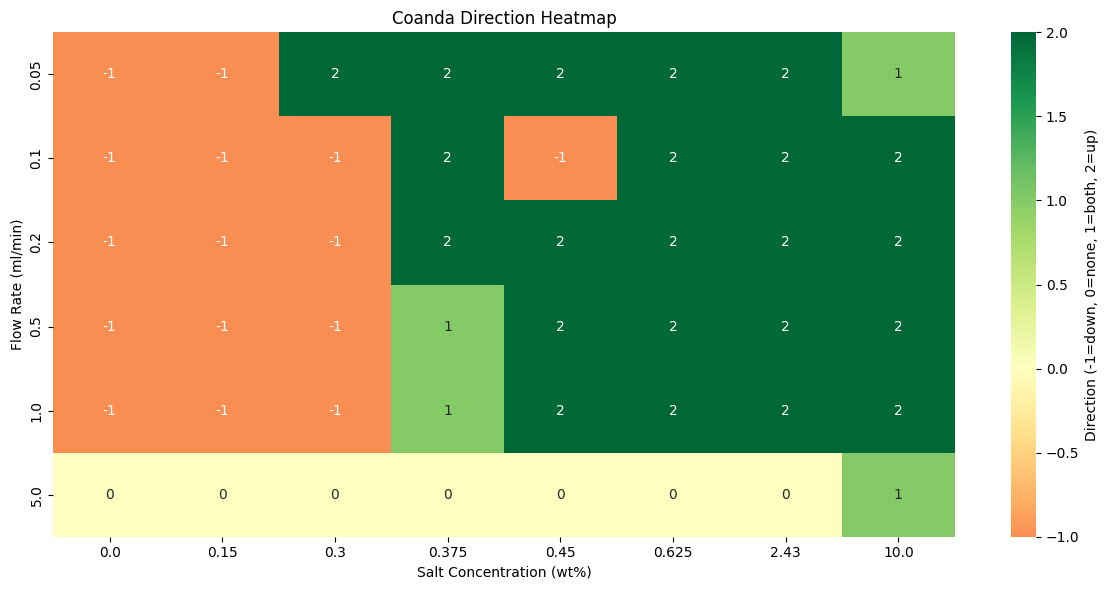

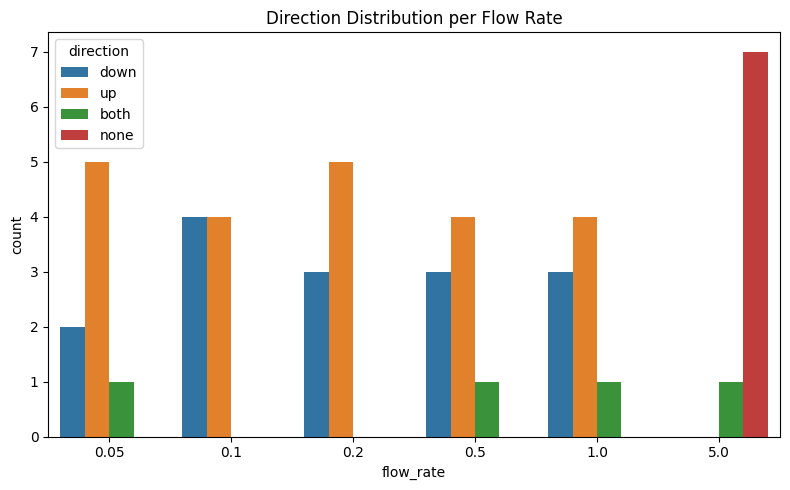

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 1. Manually encode your table
# ----------------------------
data = [
    # flow, salt, direction
    (0.05, 0.0, "down"),
    (0.05, 0.15, "down"),
    (0.05, 0.30, "up"),
    (0.05, 0.375, "up"),
    (0.05, 0.45, "up"),
    (0.05, 0.625, "up"),
    (0.05, 2.43, "up"),
    (0.05, 10.0, "both"),

    (0.1, 0.0, "down"),
    (0.1, 0.15, "down"),
    (0.1, 0.30, "down"),
    (0.1, 0.375, "up"),
    (0.1, 0.45, "down"),
    (0.1, 0.625, "up"),
    (0.1, 2.43, "up"),
    (0.1, 10.0, "up"),

    (0.2, 0.0, "down"),
    (0.2, 0.15, "down"),
    (0.2, 0.30, "down"),
    (0.2, 0.375, "up"),
    (0.2, 0.45, "up"),
    (0.2, 0.625, "up"),
    (0.2, 2.43, "up"),
    (0.2, 10.0, "up"),

    (0.5, 0.0, "down"),
    (0.5, 0.15, "down"),
    (0.5, 0.30, "down"),
    (0.5, 0.375, "both"),
    (0.5, 0.45, "up"),
    (0.5, 0.625, "up"),
    (0.5, 2.43, "up"),
    (0.5, 10.0, "up"),

    (1.0, 0.0, "down"),
    (1.0, 0.15, "down"),
    (1.0, 0.30, "down"),
    (1.0, 0.375, "both"),
    (1.0, 0.45, "up"),
    (1.0, 0.625, "up"),
    (1.0, 2.43, "up"),
    (1.0, 10.0, "up"),

    (5.0, 0.0, "none"),
    (5.0, 0.15, "none"),
    (5.0, 0.30, "none"),
    (5.0, 0.375, "none"),
    (5.0, 0.45, "none"),
    (5.0, 0.625, "none"),
    (5.0, 2.43, "none"),
    (5.0, 10.0, "both"),
]

df = pd.DataFrame(data, columns=["flow_rate", "salt_conc", "direction"])

# ----------------------------
# 2. Summary table
# ----------------------------
summary = (
    df.groupby(["flow_rate", "direction"])
      .size()
      .unstack(fill_value=0)
)

print("Summary by Flow Rate:")
display(summary)

# ----------------------------
# 3. Heatmap (categorical encoded)
# ----------------------------
direction_map = {
    "down": -1,
    "none": 0,
    "both": 1,
    "up": 2,
}

df["direction_code"] = df["direction"].map(direction_map)

pivot = df.pivot(index="flow_rate", columns="salt_conc", values="direction_code")

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    cmap="RdYlGn",
    center=0,
    cbar_kws={"label": "Direction (-1=down, 0=none, 1=both, 2=up)"}
)
plt.title("Coanda Direction Heatmap")
plt.ylabel("Flow Rate (ml/min)")
plt.xlabel("Salt Concentration (wt%)")
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Direction distribution plot
# ----------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="flow_rate", hue="direction")
plt.title("Direction Distribution per Flow Rate")
plt.tight_layout()
plt.show()
